In [1]:
!pip install ../mtl_code

Processing /Users/pierre-antoine/Desktop/inria_bilevel_optim/mtl_code
  Created wheel for mtl: filename=mtl-0.0.0-cp37-none-any.whl size=5359 sha256=9bc6667137b9a0ad5bfa9340c38114c183d67e3ac6192a192d045aa4bf12eca8
  Stored in directory: /private/var/folders/88/1nv03x2s1mv2xlv78myb8nnc0000gn/T/pip-ephem-wheel-cache-ju210w9b/wheels/47/64/79/3da8c850f6210d2d028b32e5bf63ff67613b14e3c2a7444888
Successfully built mtl
  Found existing installation: mtl 0.0.0
    Uninstalling mtl-0.0.0:
      Successfully uninstalled mtl-0.0.0


In [13]:
from mtl.simulated_data import simulate_data
from mtl.mtl import ReweightedMTL
from mtl.cross_validation import MultiTaskLassoCV

import numpy as np
from numpy.linalg import norm

from sklearn.utils import check_random_state

import matplotlib.pyplot as plt
import seaborn as sns

## Generate and visualize data

In [14]:
rng = check_random_state(0)

n_samples, n_features, n_tasks = 10, 50, 5
n_relevant_features = 5

support = rng.choice(n_features, n_relevant_features, replace=False)

coef = np.zeros((n_features, n_tasks))
times = np.linspace(0, 2 * np.pi, n_tasks)

for k in support:
    coef[k, :] = np.sin((1.0 + rng.randn(1)) * times + 3 * rng.randn(1))

X = rng.randn(n_samples, n_features)
Y = X @ coef + rng.randn(n_samples, n_tasks)
Y /= norm(Y, ord="fro")

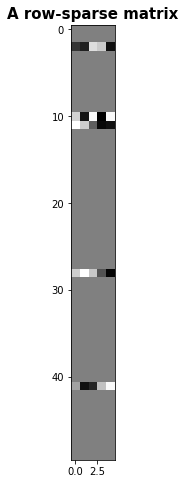

In [23]:
fig = plt.figure(figsize=(5, 8))
plt.title('A row-sparse matrix', fontweight="bold", fontsize=15)
plt.imshow(coef, cmap="binary");

In [28]:
def compute_alpha_max(X, Y):
    return np.max(X.T @ Y) / X.shape[0]

In [30]:
alpha_max = compute_alpha_max(X, Y)
print('Alpha max:', lambda_max)

Alpha max: 0.13455589089767123


In [31]:
regressor = ReweightedMTL()
regressor.fit(X, Y)

Iteration 0: 0.1403
Iteration 1: 0.0634
Iteration 2: 0.0500
Iteration 3: 0.0500
Iteration 4: 0.0500


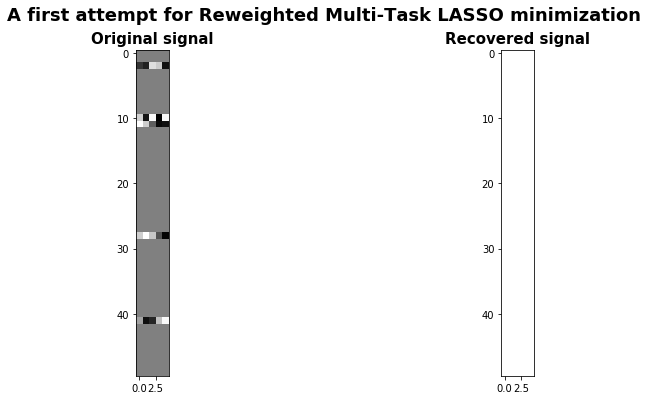

In [32]:
coef_hat = regressor.weights

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].set_title('Original signal', fontweight="bold", fontsize=15)
axes[0].imshow(coef, cmap="binary")

axes[1].set_title('Recovered signal', fontweight="bold", fontsize=15)
axes[1].imshow(coef_hat, cmap="binary")

fig.suptitle('A first attempt for Reweighted Multi-Task LASSO minimization', fontweight="bold", fontsize=18);

This is an expected result as the default $\alpha$ is very close to $\alpha_{\text{max}}$. All coefficients are zeroed-out.

## Cross-validation

In [34]:
alphas = [0.001, 0.003, 0.005, 0.007, 0.009,
          0.01, 0.03, 0.05, 0.07, 0.09,
          0.1, 0.3, 0.5, 0.7, 0.9]

In [35]:
regressor = MultiTaskLassoCV(alphas, n_folds=5)

In [36]:
regressor.fit(X, Y)

Fitting MTL estimator with alpha = 0.001
Criterion reduced from inf to 0.02433 for alpha = 0.001
Fitting MTL estimator with alpha = 0.003


/Users/pierre-antoine/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:1953: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0001934284160738801, tolerance: 6.187222450004626e-05
  check_random_state(self.random_state), random)


Criterion reduced from 0.02433 to 0.01910 for alpha = 0.003
Fitting MTL estimator with alpha = 0.005
Fitting MTL estimator with alpha = 0.007
Fitting MTL estimator with alpha = 0.009
Criterion reduced from 0.01910 to 0.01841 for alpha = 0.009
Fitting MTL estimator with alpha = 0.01
Criterion reduced from 0.01841 to 0.01767 for alpha = 0.01
Fitting MTL estimator with alpha = 0.03
Fitting MTL estimator with alpha = 0.05
Fitting MTL estimator with alpha = 0.07
Fitting MTL estimator with alpha = 0.09
Fitting MTL estimator with alpha = 0.1
Fitting MTL estimator with alpha = 0.3
Fitting MTL estimator with alpha = 0.5
Fitting MTL estimator with alpha = 0.7
Fitting MTL estimator with alpha = 0.9


Best criterion: 0.017671202767571774
Best alpha: 0.01


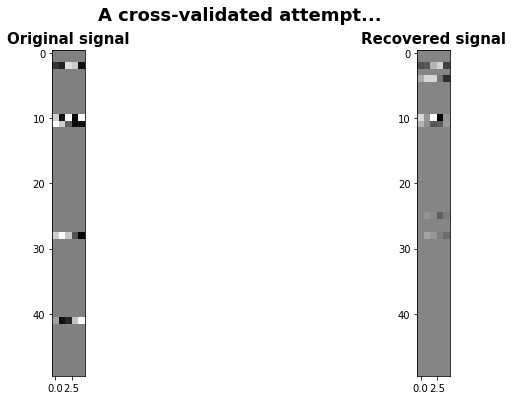

In [37]:
coef_hat = regressor.weights

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].set_title('Original signal', fontweight="bold", fontsize=15)
axes[0].imshow(coef, cmap="binary")

axes[1].set_title('Recovered signal', fontweight="bold", fontsize=15)
axes[1].imshow(coef_hat, cmap="binary")

fig.suptitle('A cross-validated attempt...', fontweight="bold", fontsize=18);

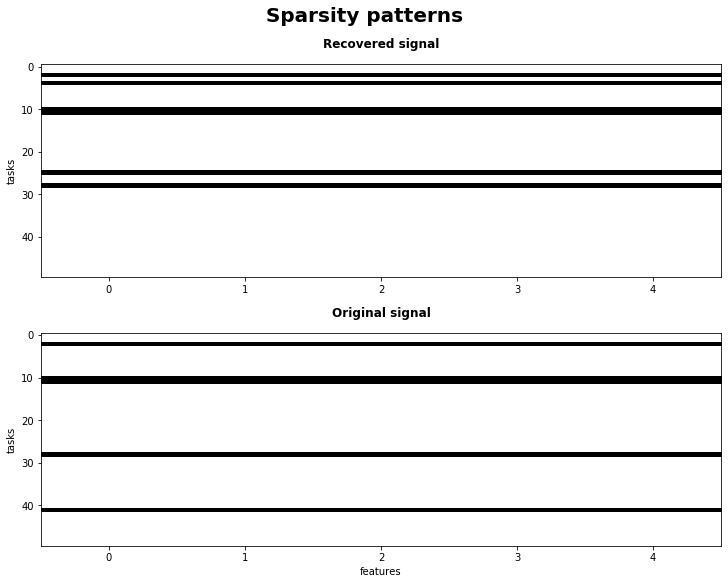

In [46]:
fig, axarr = plt.subplots(2, 1, figsize=(10, 8), constrained_layout=True)

axarr[0].spy(coef_hat, aspect="auto")
axarr[0].xaxis.tick_bottom()
axarr[0].set_title("Recovered signal", fontweight="bold")
axarr[0].set_ylabel("tasks")
axarr[1].spy(coef, aspect="auto")
axarr[1].xaxis.tick_bottom()
axarr[1].set_title("Original signal", fontweight="bold")

plt.suptitle("Sparsity patterns", fontsize=20, fontweight="bold")
plt.ylabel("tasks")
plt.xlabel("features")
plt.show(block=False)

In [48]:
regressor = ReweightedMTL(alpha=0.01)
regressor.fit(X, Y, n_iterations=10)

Iteration 0: 0.0308
Iteration 1: 0.0225
Iteration 2: 0.0211
Iteration 3: 0.0206
Iteration 4: 0.0206
Iteration 5: 0.0203
Iteration 6: 0.0200
Iteration 7: 0.0200
Iteration 8: 0.0200
Iteration 9: 0.0200


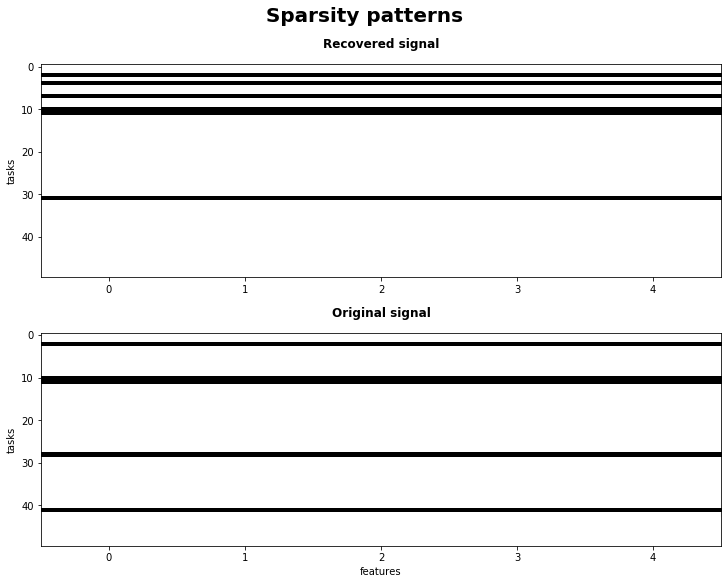

In [49]:
coef_hat = regressor.weights

fig, axarr = plt.subplots(2, 1, figsize=(10, 8), constrained_layout=True)

axarr[0].spy(coef_hat, aspect="auto")
axarr[0].xaxis.tick_bottom()
axarr[0].set_title("Recovered signal", fontweight="bold")
axarr[0].set_ylabel("tasks")
axarr[1].spy(coef, aspect="auto")
axarr[1].xaxis.tick_bottom()
axarr[1].set_title("Original signal", fontweight="bold")

plt.suptitle("Sparsity patterns", fontsize=20, fontweight="bold")
plt.ylabel("tasks")
plt.xlabel("features")
plt.show(block=False)